In [1]:
pip install photutils astropy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [1]:
from astropy.io import fits
from astropy.stats import mad_std
from photutils.detection import DAOStarFinder
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
import numpy as np

# Load FITS file
hdul = fits.open('M31_R_29092016.fits')
data = hdul[0].data
hdul.close()

# Estimate background noise
bkg_sigma = mad_std(data)


In [8]:
mean_val = np.median(data)
daofind = DAOStarFinder(fwhm=3.0, threshold=10.*bkg_sigma)
sources = daofind(data - mean_val)

# Print pixel coordinates
for i in range(len(sources)):
    print(f"Star {i+1}: x={sources['xcentroid'][i]:.2f}, y={sources['ycentroid'][i]:.2f}")


Star 1: x=2690.40, y=0.82
Star 2: x=1779.56, y=4.92
Star 3: x=3408.95, y=6.44
Star 4: x=124.67, y=8.70
Star 5: x=1839.32, y=6.86
Star 6: x=128.44, y=8.35
Star 7: x=23.43, y=9.84
Star 8: x=27.71, y=9.60
Star 9: x=1278.41, y=8.08
Star 10: x=3407.56, y=8.32
Star 11: x=518.45, y=12.35
Star 12: x=1136.57, y=16.04
Star 13: x=381.85, y=18.97
Star 14: x=3544.47, y=21.16
Star 15: x=3543.32, y=22.77
Star 16: x=3542.17, y=22.78
Star 17: x=9.94, y=27.76
Star 18: x=7.64, y=30.28
Star 19: x=192.44, y=35.60
Star 20: x=2874.39, y=36.15
Star 21: x=196.50, y=36.02
Star 22: x=2873.39, y=35.84
Star 23: x=194.70, y=37.80
Star 24: x=2222.13, y=40.18
Star 25: x=1211.40, y=40.00
Star 26: x=2221.26, y=40.36
Star 27: x=2309.41, y=43.83
Star 28: x=1205.67, y=44.38
Star 29: x=854.18, y=50.36
Star 30: x=853.13, y=52.26
Star 31: x=1344.77, y=56.95
Star 32: x=2048.67, y=61.00
Star 33: x=1448.09, y=66.86
Star 34: x=1821.66, y=71.45
Star 35: x=3959.63, y=72.70
Star 36: x=1812.34, y=73.88
Star 37: x=3978.61, y=75.99
St

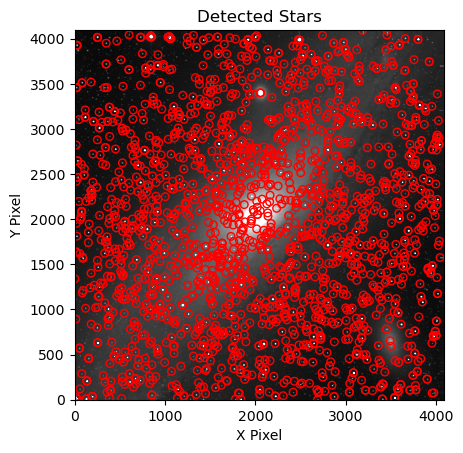

In [9]:
norm = simple_norm(data, 'sqrt', percent=99)
plt.imshow(data, cmap='gray', norm=norm, origin='lower')
plt.scatter(sources['xcentroid'], sources['ycentroid'], s=30, edgecolor='red', facecolor='none')
plt.title("Detected Stars")
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()


In [10]:
# Sort detected stars by brightness (assumes 'flux' exists)
sources.sort('flux')

# Take the brightest N (e.g., 15)
bright_sources = sources[-30:]  # or use sources[::-1][:15]


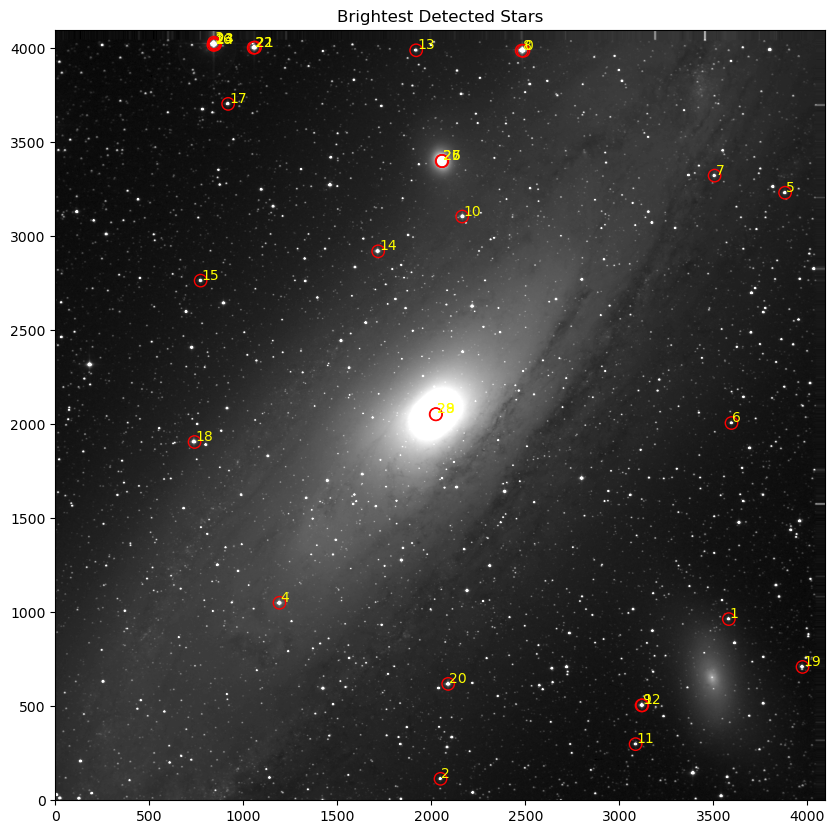

In [11]:
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

norm = simple_norm(data, 'sqrt', percent=99)
plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='gray', norm=norm, origin='lower')
plt.scatter(bright_sources['xcentroid'], bright_sources['ycentroid'],
            s=80, edgecolor='red', facecolor='none')

# Label them for identification
for i, row in enumerate(bright_sources):
    plt.text(row['xcentroid'] + 5, row['ycentroid'] + 5, str(i), color='yellow')

plt.title("Brightest Detected Stars")
plt.show()


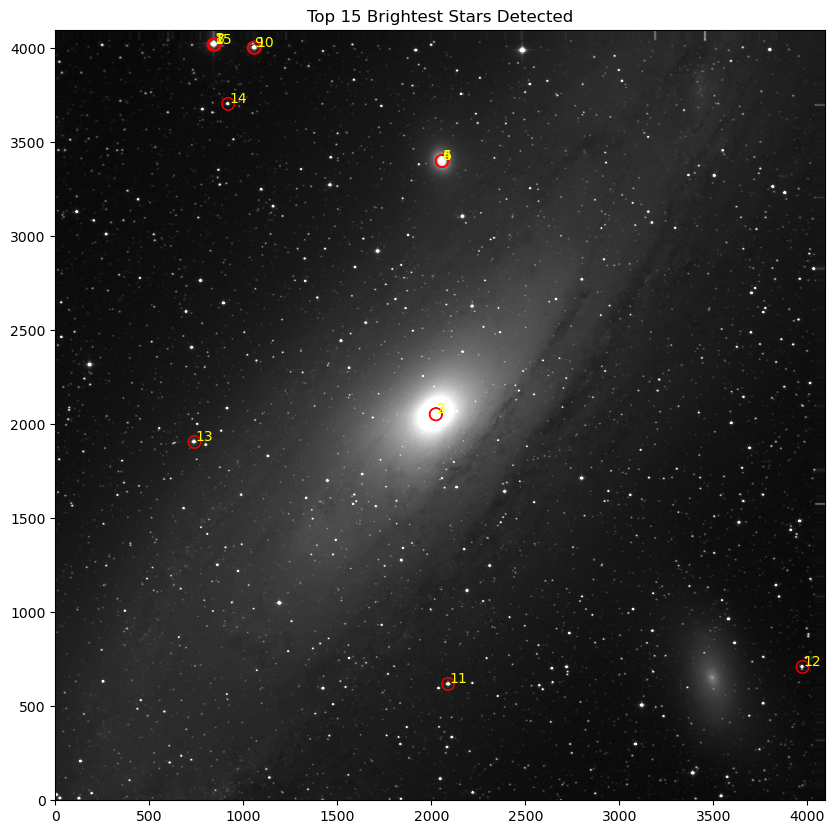

In [12]:
from astropy.io import fits
from astropy.stats import mad_std
from photutils.detection import DAOStarFinder
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

# Load FITS
hdul = fits.open("M31_R_29092016.fits")
data = hdul[0].data
hdul.close()

# Estimate background
bkg_sigma = mad_std(data)

# Detect stars
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*bkg_sigma)
sources = daofind(data - np.median(data))
sources.sort('flux')
brightest = sources[::-1][:15]

# Plot
norm = simple_norm(data, 'sqrt', percent=99.5)
plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='gray', norm=norm, origin='lower')
plt.scatter(brightest['xcentroid'], brightest['ycentroid'], s=80,
            edgecolor='red', facecolor='none')

for i, row in enumerate(brightest):
    plt.text(row['xcentroid'] + 5, row['ycentroid'] + 5, str(i+1), color='yellow')

plt.title("Top 15 Brightest Stars Detected")
plt.savefig("labeled_fits_stars.png", dpi=300)
plt.show()
